# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [69]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from scipy import stats
import statsmodels
import statsmodels.api as sm


In [53]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [83]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\Ameen\Miniconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


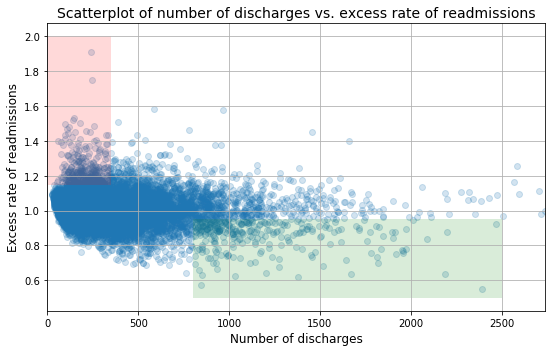

In [84]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [56]:
x, y = ecdf(clean_hospital_read_df['Excess Readmission Ratio'])

Text(0,0.5,'CDF')

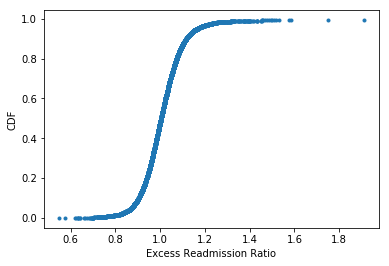

In [57]:
_ = plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('Excess Readmission Ratio')
plt.ylabel('CDF')

Visualizing the data with an ecdf graph helps to get a feel for the data.

Null Hypothesis : Readmission ratio is the same among hopsitals based off varying discharge count

Alternative Hypothesis: Less discharges (smaller hospitals) correlates with higher readmission ratio

Significant Value: .01 % 

In [58]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y


C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


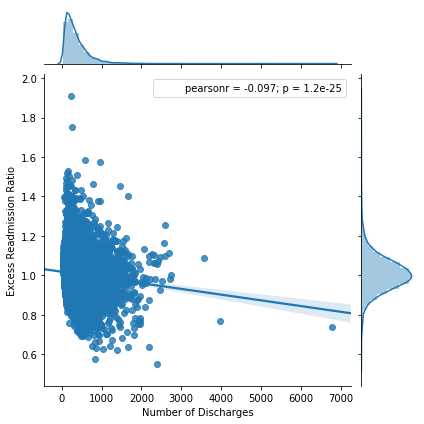

In [86]:
de = clean_hospital_read_df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()

_ = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=de, kind='reg')

A negative pearsonr from data does comply with the inital findings that as the discharges go up, readmission rate goes down. The very low p-value means we can assume this to be true.

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


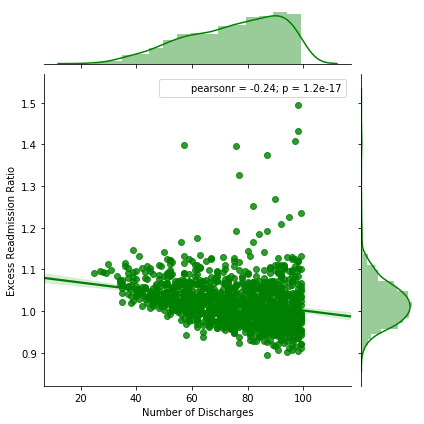

In [87]:
de_low = de[de['Number of Discharges'] < 100]

_ = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=de_low, kind='reg', color='green')

We can see an ever more negative correlation with the number of discharges capped at 100. The low p value falls in line with our alpha value. As discharges are going up, readmission ratio is going down.

C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Ameen\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


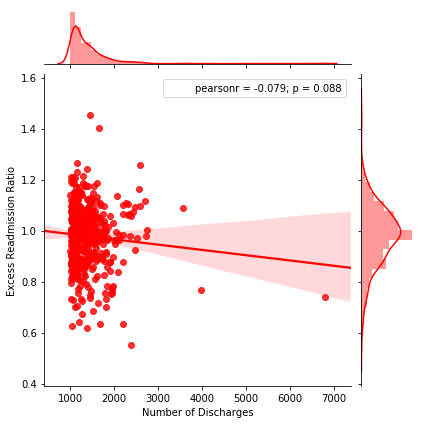

In [88]:
de_high = de[de['Number of Discharges'] > 1000]

_ = sns.jointplot(x='Number of Discharges', y='Excess Readmission Ratio', data=de_high, kind='reg', color='red')

The correlation remains negative, but the p value is too high to fall inline with our alpha value. 

In [91]:
low = de_low['Excess Readmission Ratio']
high = de_high['Excess Readmission Ratio']

tstat, pvalue = stats.ttest_ind(low, high)

print('t-stat:', tstat, 'p-value:', pvalue)

t-stat: 10.060620398500793 p-value: 3.778753923341558e-23


# 3)

The given t stat and p value further support that the liklihood of the null hypothesis is extremely unlikely. 

For the above tests I relied on the assumption that number of discharges translated into the size of the hopsital. I dislike this assumption because I can imagine it to be incorrect in many instants. The dataset does not provide the actual hospital size or patient limit, or patient average. These would be more accurate mediums to measure the capacity of a hopsital. The number of discharges between hospitals im sure can vary greatly. Just because a hospital has less discharges, might not necessarily mean its a smaller hospital. 

Despite this I conducted statistical tests assmuming the assumption made in the inital sample. 

# 4)

The tests proved to show statistical and practical significance. We are dealing with a fairly large dataset that's results will be utilized by a great number of hoppitals. Even if the statistical difference was small, a small percentage will make a big difference in our scenario because a small change in excess readmission ratio will determine whether or not the hospital receives medicare funding. 

# 5)

The plot does a good job of highlighting the significant difference in excess ratio between hospitals with number of discharges and those with little (assumed to be large and small hospitals respectively) A disadvantage is that its only focusing on this one variable and may lead to incorrect assumptions. A graph may not be enough to make conclusions. If you were using this graph as a way to make decisions for stakeholders, it could be misleading. 

In [93]:
_ = sns.pairplot(x='Number of Discharges', y='Excess Readmission Ratio', data=de_low)

TypeError: pairplot() got an unexpected keyword argument 'x'

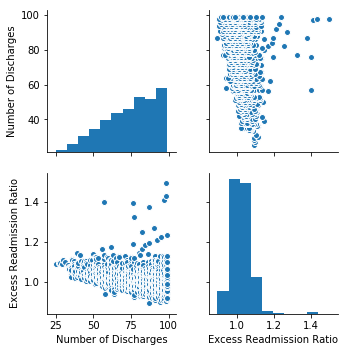

In [98]:
_ = sns.pairplot(data=de_low) #low discharges

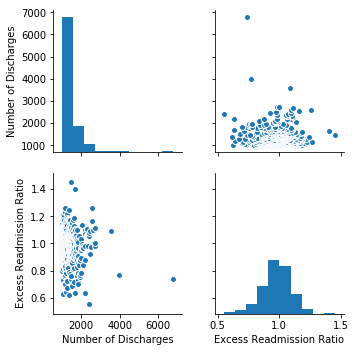

In [104]:
_ = sns.pairplot(data=de_high) #high discharges

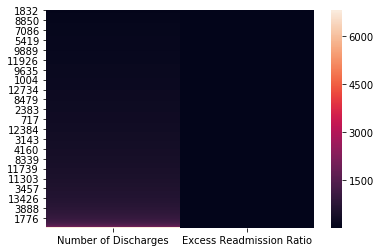

In [110]:
_ = sns.heatmap(data=de)

In [111]:
de.corr()

,Number of Discharges,Excess Readmission Ratio
Number of Discharges,1.000000,-0.097398
Excess Readmission Ratio,-0.097398,1.000000
